In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Step 3 : Extracting Input Cols(Features) and Output(Target)
data['YearsExperience']

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [4]:
X=data.iloc[:,0:1].values


In [5]:
y=data.iloc[:,1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [6]:
#Step 4: Cross Validation/ Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test=train_test_split(X,y,test_size=0.2)

In [7]:
X_train.shape

(24, 1)

In [8]:
y_train.shape

(24,)

In [9]:
X_test.shape

(6, 1)

In [10]:
y_test.shape

(6,)

In [11]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [12]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
X_test

array([[5.3],
       [3. ],
       [1.1],
       [8.2],
       [1.3],
       [6.8]])

In [14]:
y_test

array([ 83088.,  60150.,  39343., 113812.,  46205.,  91738.])

In [15]:
regressor.predict(X_test[3].reshape(1,1))

array([102278.07141959])

In [17]:
def salary_predictor(experience):
   print(regressor.predict(np.array(experience).reshape(1,1))[0])

n=input('experience')
salary_predictor(float(n))

experience2
42447.60823044891


In [18]:
exp=data['YearsExperience'].values
exp

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [19]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

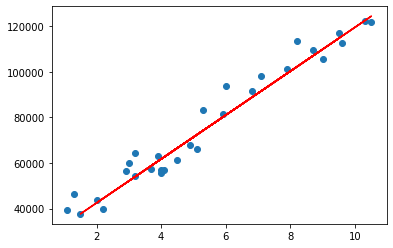

In [20]:
plt.scatter(exp,y)
plt.plot(X_train,regressor.predict(X_train),color='red')

In [21]:
m=regressor.coef_

c=regressor.intercept_

In [22]:
m*500 + c

array([4848184.81277741])

In [23]:
from sklearn.metrics import r2_score

In [24]:
y_pred=regressor.predict(X_test)

In [25]:
y_pred

array([ 74292.8547666 ,  52097.68293837,  33762.54099332, 102278.07141959,
        35692.5559349 ,  88767.96682849])

In [26]:
y_test

array([ 83088.,  60150.,  39343., 113812.,  46205.,  91738.])

In [27]:
r2_score(y_test,y_pred)

0.8969785814624088

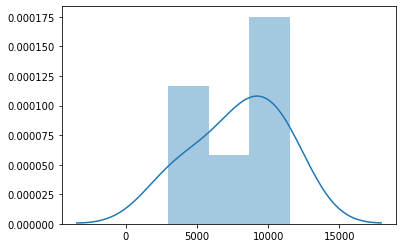

In [28]:
sns.distplot(y_test-y_pred)